In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [43]:
# Define the model function
def model(x, a, b, c):
    return a * x + b * np.sin(c * x)

In [46]:
# Generate synthetic data
np.random.seed(0)  # For reproducibility
x_data = np.linspace(0, 100, 100)  # 1000 points from 0 to 10
x_test = np.linspace(0, 100, 1000)
a_true, b_true, c_true = 0.2, 3, 1  # True parameters
y_data = model(x_data, a_true, b_true, c_true) + np.random.normal(0, 0.5, x_data.size)

In [47]:
# Fit the model to the data
initial_guess = [1, 1, 1]  # Initial guess for parameters a, b, c
params, covariance = curve_fit(model, x_data, y_data, p0=initial_guess)

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Generate fitted values
y_fit = model(x_test, *params)

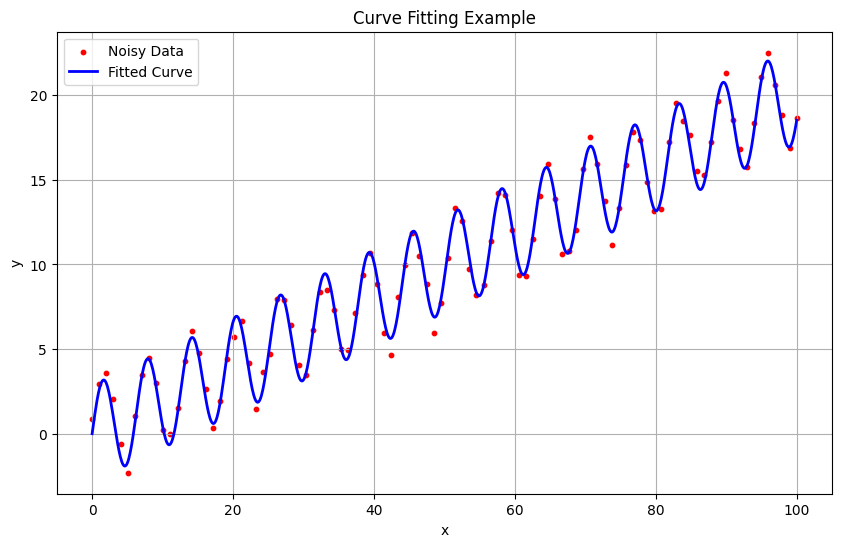

True parameters: a=0.2, b=3, c=1
Fitted parameters: a=0.20002297782437004, b=2.8519942629757153, c=0.9998579420028259


In [48]:
# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Noisy Data', color='red', s=10)
plt.plot(x_test, y_fit, label='Fitted Curve', color='blue', linewidth=2)
plt.title('Curve Fitting Example')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Print the true and fitted parameters
print(f"True parameters: a={a_true}, b={b_true}, c={c_true}")
print(f"Fitted parameters: a={a_fit}, b={b_fit}, c={c_fit}")

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the model function with multiple sine and cosine terms
def model(x, a, *params):
    y = a * x
    for i in range(0, len(params), 2):
        b = params[i]
        c = params[i + 1]
        y += b * np.sin(c * x) + params[i + 2] * np.cos(params[i + 3] * x)
    return y

# Define the cost function for optimization
def cost_function(params, x_data, y_data):
    a = params[0]
    model_predictions = model(x_data, a, *params[1:])
    return np.sum((y_data - model_predictions) ** 2)  # Sum of squared errors

# Generate synthetic data
np.random.seed(0)  # For reproducibility
x_data = np.linspace(0, 10, 100)  # 100 points from 0 to 10

# True parameters
a_true = 2
b_true = [1, 0.5]  # Coefficients for sine
c_true = [1, 1.5]  # Frequencies for sine
d_true = [0.5, 0.3]  # Coefficients for cosine
e_true = [1, 2]  # Frequencies for cosine

# Generate y_data based on the true parameters
y_data = a_true * x_data
for i in range(len(b_true)):
    y_data += b_true[i] * np.sin(c_true[i] * x_data) + d_true[i] * np.cos(e_true[i] * x_data)

# Add noise
y_data += np.random.normal(0, 0.5, x_data.size)

# Prepare initial guess for parameters
initial_guess = [1] + [1, 1, 1, 1] * len(b_true)  # Initial guess for a, b_i, c_i, d_i, e_i

# Optimize the parameters using minimize
result = minimize(cost_function, initial_guess, args=(x_data, y_data))

# Extract the fitted parameters
fitted_params = result.x
a_fit = fitted_params[0]

# Generate fitted values
y_fit = model(x_data, *fitted_params)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data (with noise)', color='red', s=10)
plt.plot(x_data, y_fit, label='Fitted Curve', color='blue', linewidth=2)
plt.title('Curve Fitting Example with Multiple Sine and Cosine Terms using Minimize')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Print the true and fitted parameters
print(f"True parameters: a={a_true}, b={b_true}, c={c_true}, d={d_true}, e={e_true}")
print(f"Fitted parameters: a={a_fit}, b={fitted_params[1::4]}, c={fitted_params[2::4]}, d={fitted_params[3::4]}, e={fitted_params[4::4]}")


IndexError: tuple index out of range